In [1]:
import pandas as pd
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
df_inflation = pd.read_excel('statistic_id273418_us-monthly-inflation-rate-december-2022.xlsx', skiprows=5, header=None, sheet_name='Data')
df_inflation.columns = ['0', 'date', 'inflation rate in %', 'none']
df_inflation['date'] = pd.to_datetime(df_inflation.date, format='%Y-%m')
df_inflation

,0,date,inflation rate in %,none
0,NaN,2020-01-31,2.5,in %
1,NaN,2020-02-29,2.3,in %
2,NaN,2020-03-31,1.5,in %
3,NaN,2020-04-30,0.3,in %
4,NaN,2020-05-31,0.1,in %
5,NaN,2020-06-30,0.6,in %
6,NaN,2020-07-31,1.0,in %
7,NaN,2020-08-31,1.3,in %
8,NaN,2020-09-30,1.4,in %
9,NaN,2020-10-31,1.2,in %


In [3]:
inflation = df_inflation[['date','inflation rate in %']].copy()
inflation['date'] = inflation['date'].dt.date
inflation.set_index('date', inplace=True)
print(inflation)
print(inflation.index)

            inflation rate in %
date                           
2020-01-31                  2.5
2020-02-29                  2.3
2020-03-31                  1.5
2020-04-30                  0.3
2020-05-31                  0.1
2020-06-30                  0.6
2020-07-31                  1.0
2020-08-31                  1.3
2020-09-30                  1.4
2020-10-31                  1.2
2020-11-30                  1.2
2020-12-31                  1.4
2021-01-31                  1.4
2021-02-28                  1.7
2021-03-31                  2.6
2021-04-30                  4.2
2021-05-31                  5.0
2021-06-30                  5.4
2021-07-31                  5.4
2021-08-31                  5.3
2021-09-30                  5.4
2021-10-31                  6.2
2021-11-30                  6.8
2021-12-31                  7.0
2022-01-31                  7.5
2022-02-28                  7.9
2022-03-31                  8.5
2022-04-30                  8.3
2022-05-31                  8.6
2022-06-

In [4]:
df_covid_USA_monthly = pd.read_excel('USA_covid_monthly_new_cases.xlsx')
df_covid_USA_monthly

,date,new_cases
0,2020-01-31,7
1,2020-02-29,17
2,2020-03-31,192054
3,2020-04-30,889072
4,2020-05-31,710396
5,2020-06-30,857250
6,2020-07-31,1899698
7,2020-08-31,1497991
8,2020-09-30,1199713
9,2020-10-31,1930152


In [5]:
covid_USA_monthly = df_covid_USA_monthly[['date', 'new_cases']].copy()
covid_USA_monthly['date'] = covid_USA_monthly['date'].astype('datetime64[ns]')
covid_USA_monthly.set_index('date', inplace=True)
covid_USA_monthly['new_cases'] = covid_USA_monthly['new_cases']/1000000
print(covid_USA_monthly)

            new_cases
date                 
2020-01-31   0.000007
2020-02-29   0.000017
2020-03-31   0.192054
2020-04-30   0.889072
2020-05-31   0.710396
2020-06-30   0.857250
2020-07-31   1.899698
2020-08-31   1.497991
2020-09-30   1.199713
2020-10-31   1.930152
2020-11-30   4.491575
2020-12-31   6.551956
2021-01-31   6.137229
2021-02-28   2.407191
2021-03-31   1.815185
2021-04-30   1.888570
2021-05-31   0.918397
2021-06-30   0.395878
2021-07-31   1.325072
2021-08-31   4.287672
2021-09-30   4.144489
2021-10-31   2.573736
2021-11-30   2.552962
2021-12-31   6.301355
2022-01-31  20.231780
2022-02-28   3.938389
2022-03-31   1.040696
2022-04-30   1.244746
2022-05-31   2.861179
2022-06-30   3.348059
2022-07-31   3.669554
2022-08-31   3.183248
2022-09-30   1.833486
2022-10-31   1.130188
2022-11-30   1.321265
2022-12-31   1.951712


<IPython.core.display.Javascript object>


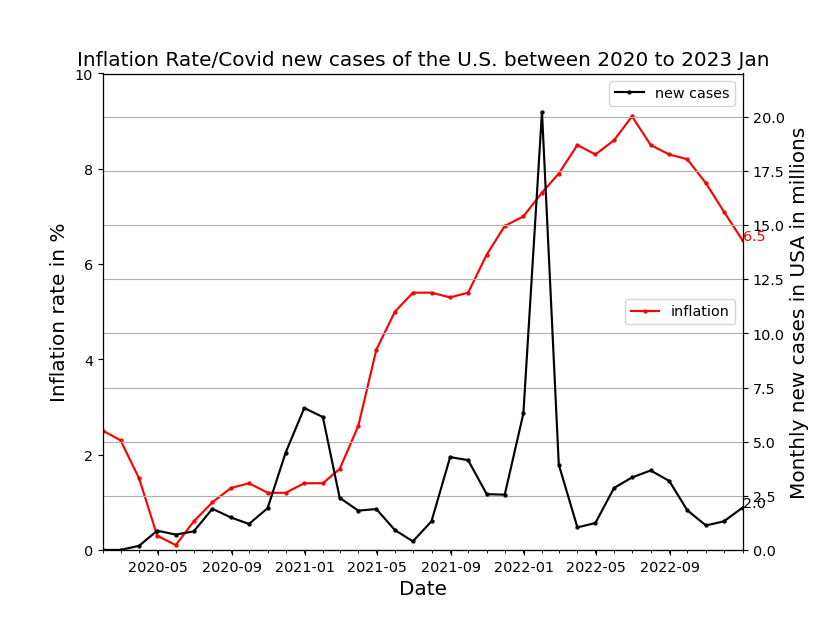

In [7]:
%matplotlib notebook

y = inflation['inflation rate in %']
x = inflation.index

y_covid = covid_USA_monthly['new_cases']
x_covid = covid_USA_monthly.index

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()

ax1.set_xlim(min(x), max(x))
ax1.set_ylim(0, 10)
ax1.set_xticks(x, rotation=45, fontsize=8, minor=True)
ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Inflation rate in %',fontsize=14)
ax1.set_title('Inflation Rate/Covid new cases of the U.S. between 2020 to 2023 Jan',fontsize=14)

draw_inflation, = ax1.plot([], [], marker = 'o', markersize = '2', color = 'red', label='inflation')
ax1.legend(loc="center right")

ax = plt.gca()
text_1 = ax.text(0.5, 0.5, '', color='red')

#ax2.set_xlim(min(x_covid), max(x_covid))
ax2.set_ylim(0, 22)
#ax2.set_xticks([covid_USA_fit.index[9], covid_USA_fit.index[38], covid_USA_fit.index[69], covid_USA_fit.index[99], covid_USA_fit.index[130], covid_USA_fit.index[160],
               #covid_USA_fit.index[191], covid_USA_fit.index[222], covid_USA_fit.index[252], covid_USA_fit.index[283], covid_USA_fit.index[313], covid_USA_fit.index[344],
               #covid_USA_fit.index[375], covid_USA_fit.index[403], covid_USA_fit.index[434], covid_USA_fit.index[464], covid_USA_fit.index[495], covid_USA_fit.index[525],
               #covid_USA_fit.index[556], covid_USA_fit.index[587], covid_USA_fit.index[617], covid_USA_fit.index[648], covid_USA_fit.index[678], covid_USA_fit.index[709],
               #covid_USA_fit.index[740], covid_USA_fit.index[768], covid_USA_fit.index[799], covid_USA_fit.index[829], covid_USA_fit.index[860], covid_USA_fit.index[890],
               #covid_USA_fit.index[921], covid_USA_fit.index[952], covid_USA_fit.index[982], covid_USA_fit.index[1013], covid_USA_fit.index[1043], covid_USA_fit.index[1074],
               #covid_USA_fit.index[1099]], labels=covid_date, rotation=45)
#ax2.set_xlabel('Date',fontsize=20)
ax2.set_ylabel('Monthly new cases in USA in millions',fontsize=14)
#ax2.set_title('Daily new cases of the U.S. between 2020 to 2023 Jan',fontsize=20)


draw_covid, = ax2.plot([], [], marker = 'o', markersize = '2', color = 'black', label='new cases')
ax2.legend(loc="upper right")
text_2 = ax.text(0.5, 0.5, '', color='black')

def update(idx):
    draw_inflation.set_data(x[:idx + 1], y[:idx + 1])
    text_1.set_text(f'{y[idx]:.1f}')
    text_1.set_position((x[idx], y[idx]*2.2))
    draw_covid.set_data(x_covid[:idx + 1], y_covid[:idx + 1])
    text_2.set_text(f'{y_covid[idx]:.1f}')
    text_2.set_position((x_covid[idx], y_covid[idx]))
    return draw_inflation, text_1, draw_covid, text_2,

#def update_inflation(idx):
    #draw_inflation.set_data(x[:idx + 1], y[:idx + 1])
    #text.set_text(f'{y[idx]:.1f}')
    #text.set_position((x[idx], y[idx]))
    #return draw_inflation, text_1,

#def update_covid(idx):
    #draw_covid.set_data(x_covid[:idx + 1], y_covid[:idx + 1])
    #text_2.set_text(f'{y_covid[idx]:.1f}')
    #text_2.set_position((x_covid[idx], y_covid[idx]))
    #return draw_covid, text_2,

#ani = matplotlib.animation.FuncAnimation(fig, update_covid, frames = len(x_covid), blit=True, interval = 5, repeat = False)

ani_combined = matplotlib.animation.FuncAnimation(fig, update, frames = len(x_covid), blit=True, interval = 1000, repeat = False)


plt.grid()
plt.show()

#ani_combined.save('combined.mp4', writer='ffmpeg', fps=5)

In [17]:
df_unemploy = pd.read_excel('US_unemployment_rate.xlsx', skiprows=range(1,9))
df_unemploy

,Date,value (%)
0,2020-01-31,3.5
1,2020-02-29,3.5
2,2020-03-31,4.4
3,2020-04-30,14.7
4,2020-05-31,13.2
5,2020-06-30,11.0
6,2020-07-31,10.2
7,2020-08-31,8.4
8,2020-09-30,7.9
9,2020-10-31,6.9


In [18]:
USA_unemploy_rate = df_unemploy[['Date', 'value (%)']].copy()
USA_unemploy_rate['Date'] = USA_unemploy_rate['Date'].astype('datetime64[ns]')
USA_unemploy_rate.set_index('Date', inplace=True)

In [19]:
print(USA_unemploy_rate)

            value (%)
Date                 
2020-01-31        3.5
2020-02-29        3.5
2020-03-31        4.4
2020-04-30       14.7
2020-05-31       13.2
2020-06-30       11.0
2020-07-31       10.2
2020-08-31        8.4
2020-09-30        7.9
2020-10-31        6.9
2020-11-30        6.7
2020-12-31        6.7
2021-01-31        6.3
2021-02-28        6.2
2021-03-31        6.1
2021-04-30        6.1
2021-05-31        5.8
2021-06-30        5.9
2021-07-31        5.4
2021-08-31        5.2
2021-09-30        4.8
2021-10-31        4.5
2021-11-30        4.2
2021-12-31        3.9
2022-01-31        4.0
2022-02-28        3.8
2022-03-31        3.6
2022-04-30        3.6
2022-05-31        3.6
2022-06-30        3.6
2022-07-31        3.5
2022-08-31        3.7
2022-09-30        3.5
2022-10-31        3.7
2022-11-30        3.6
2022-12-31        3.5
